<a href="https://colab.research.google.com/github/hithaankam/Alliance/blob/main/Gen_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers

In [2]:
import torch
from torchvision import transforms
from transformers import SamModel, SamProcessor
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid
import matplotlib.pyplot as plt

In [4]:
img = load_image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRAvYk7-JBOtB8Cuaxrpugw2bAChjEzgxa2XQ&s")

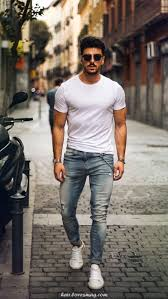

In [5]:
img

In [6]:
from transformers import SamModel, SamProcessor


In [7]:
model = SamModel.from_pretrained("Zigeng/SlimSAM-uniform-50").to("cuda")
processor = SamProcessor.from_pretrained("Zigeng/SlimSAM-uniform-50")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/365 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/112M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [8]:
from PIL import Image  # Add this line
from google.colab import files

uploaded = files.upload()  # Upload an image
img = Image.open(list(uploaded.keys())[0])  # Open the first uploaded image
img.show()  # Display the image (optional)


Saving white_tshirt.jpg to white_tshirt.jpg


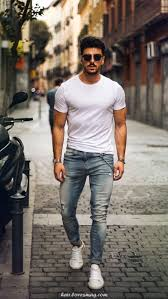

In [9]:
img  # Displays the image


In [ ]:
inputs = processor(img, input_points=input_points, return_tensors="pt").to("cuda")
outputs = model(**inputs)

NameError: name 'input_points' is not defined

In [10]:
input_points = [[[320, 800]]] # coordinates of a point on the object of interest

inputs = processor(img, input_points=input_points, return_tensors="pt").to("cuda")
outputs = model(**inputs)

# extract mask tensors
masks = processor.image_processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())

In [11]:
len(masks[0][0])

3

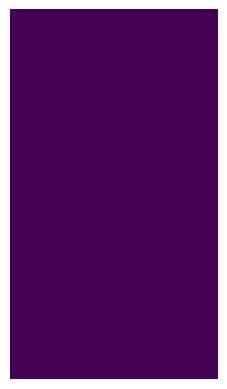

In [12]:
import matplotlib.pyplot as plt  # Import matplotlib
plt.imshow(masks[0][0][2])  # Display the image
plt.axis("off")  # Hide axes (optional)
plt.show()  # Show the plot

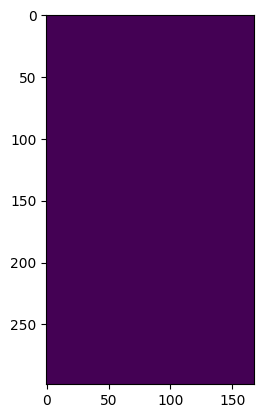

In [13]:
plt.imshow(masks[0][0][2])

In [14]:
input_points_2 = [[[200, 850]]] # coordinates of a point on the object of interest

inputs_2 = processor(img, input_points=input_points_2, return_tensors="pt").to("cuda")
outputs_2 = model(**inputs_2)
masks_2 = processor.image_processor.post_process_masks(outputs_2.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())

In [15]:

len(masks_2[0][0])

3

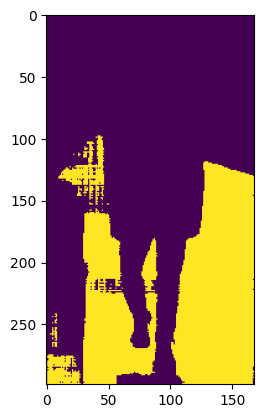

In [16]:
plt.imshow(masks_2[0][0][1])

In [19]:
# Create a ToPILImage transform
to_pil = transforms.ToPILImage()

# Convert boolean tensors to binary tensors
binary_matrix_1 = masks[0][0][2].to(dtype=torch.uint8)
binary_matrix_2 = masks_2[0][0][1].to(dtype=torch.uint8)

# apply the transform to the tensors (tensor to PIL)
mask_1 = to_pil(binary_matrix_1*255)
mask_2 = to_pil(binary_matrix_2*255)

In [20]:
!pip install torchvision


In [21]:
import torch  # Import PyTorch
from torchvision import transforms  # Import transforms

# Create a ToPILImage transform
to_pil = transforms.ToPILImage()

# Convert boolean tensors to binary tensors
binary_matrix_1 = masks[0][0][2].to(dtype=torch.uint8)
binary_matrix_2 = masks_2[0][0][1].to(dtype=torch.uint8)

# Apply the transform to the tensors (convert tensor to PIL)
mask_1 = to_pil(binary_matrix_1 * 255)
mask_2 = to_pil(binary_matrix_2 * 255)

# Display the images (optional)
mask_1.show()
mask_2.show()


In [22]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert 1-channel to 3-channel
    transforms.ToTensor()
])

tensor_images = [transform(img) for img in [img, mask_1, mask_2]]


In [23]:
def make_image_grid(images, cols=3, rows=1):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

    for ax, img in zip(axes.flatten(), images):
        ax.imshow(img)
        ax.axis("off")

    plt.show()


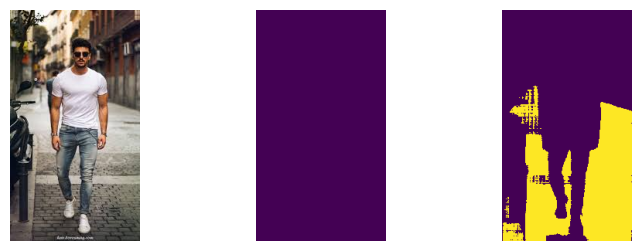

In [24]:
make_image_grid([img, mask_1, mask_2], cols=3, rows=1)

In [25]:
from diffusers import AutoPipelineForInpainting  # Import the missing class
import torch  # Import torch

# Create inpainting pipeline
pipeline = AutoPipelineForInpainting.from_pretrained(
    "redstonehero/ReV_Animated_Inpainting",
    torch_dtype=torch.float16
)

pipeline.enable_model_cpu_offload()


model_index.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker%2Fconfig.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--redstonehero--ReV_Animated_Inpainting/snapshots/0eb626cc745ef55ec63898d7a939b8c770273be8/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--redstonehero--ReV_Animated_Inpainting/snapshots/0eb626cc745ef55ec63898d7a939b8c770273be8/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--redstonehero--ReV_Animated_Inpainting/snapshots/0eb626cc745ef55ec63898d7a939b8c770273be8/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface

In [26]:
prompt = "flower-print, t-shirt"

# inpainting pipeline
image1 = pipeline(prompt=prompt,
                 width=512,
                 height=768,
                 num_inference_steps=28,
                 image=img,
                 mask_image=mask_1,
                 guidance_scale=3,
                 strength=1.0).images[0]

  0%|          | 0/28 [00:00<?, ?it/s]

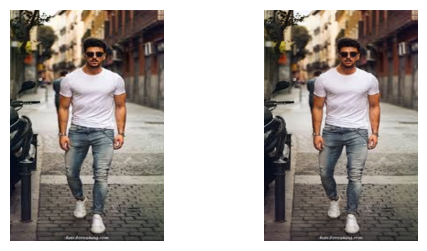

In [27]:
# compare input and output
make_image_grid([img.resize([512,768]), image1], rows = 1, cols = 2)

  0%|          | 0/30 [00:00<?, ?it/s]

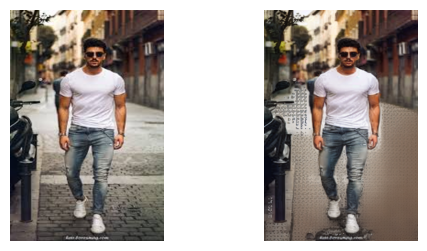

In [28]:
prompt = "tactical pants"

image = pipeline(prompt=prompt,
                 width=512,
                 height=768,
                 num_inference_steps=30,
                 image=img,
                 mask_image=mask_2,
                 guidance_scale=2.5,
                 strength=1.0).images[0]

make_image_grid([img.resize([512,768]), image], rows = 1, cols = 2)